# **Tarea 05.- Lectura de archivos netCDF**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="Imagenes/imta_logo.png" style="height: 5em; vertical-align: middle;">
<img src="Imagenes/Mexico.jpg" style="height: 5em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Docente: Dr. Gabriel Ruiz Martinez** <br>

[![Open In Colab](Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Tratamiento_Datos/blob/master/Clase_05.ipynb)

---

#### **Basado en los apuntes del Dr. Gabriel Ruiz Martinez**

**Instrucciones:**
1. Usando el intérprete de Python y el módulo xarray, genere el gráfico de la serie temporal de la altura significativa de la ola a partir de los datos que se proporcionan en el archivo netCDF.

In [1]:
# Bibliotecas necesarias
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Carga de datos
ruta_netcdf = './Datos/05_Tarea/PtoMorelos2018EneDic3h.nc'
print(f'Datos cargados desde: {ruta_netcdf}')

Datos cargados desde: ./Datos/05_Tarea/PtoMorelos2018EneDic3h.nc


In [3]:
# Leyendo el archivo NetCDF
# Abrimos el archivo netCDF con xarray
ds = xr.open_dataset(ruta_netcdf)

# Mostramos información general del dataset
print("\nInformación del dataset:")
print(ds.info())


Información del dataset:
xarray.Dataset {
dimensions:
	time = 2920 ;
	latitude = 1 ;
	longitude = 1 ;

variables:
	float64 mwd(time, latitude, longitude) ;
		mwd:units = Degree true ;
		mwd:long_name = Mean wave direction ;
	float64 pp1d(time, latitude, longitude) ;
		pp1d:units = s ;
		pp1d:long_name = Peak wave period ;
	float64 swh(time, latitude, longitude) ;
		swh:units = m ;
		swh:long_name = Significant height of combined wind waves and swell ;
	float32 longitude(longitude) ;
		longitude:units = degrees_east ;
		longitude:long_name = longitude ;
	float32 latitude(latitude) ;
		latitude:units = degrees_north ;
		latitude:long_name = latitude ;
	datetime64[ns] time(time) ;
		time:long_name = time ;

// global attributes:
	:Conventions = CF-1.6 ;
	:history = 2022-03-03 19:07:50 GMT by grib_to_netcdf-2.24.2: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data5/adaptor.mars.internal-1646334448.3648994-25633-19-aae2464c-b956-45bc-a41d-5dd9398b5fae.nc /cache/tmp/aae2464c

In [4]:
# Mostrar la estructura del dataset
print(ds)

<xarray.Dataset> Size: 93kB
Dimensions:    (time: 2920, latitude: 1, longitude: 1)
Coordinates:
  * longitude  (longitude) float32 4B -86.75
  * latitude   (latitude) float32 4B 20.74
  * time       (time) datetime64[ns] 23kB 2018-01-01 ... 2018-12-31T21:00:00
Data variables:
    mwd        (time, latitude, longitude) float64 23kB ...
    pp1d       (time, latitude, longitude) float64 23kB ...
    swh        (time, latitude, longitude) float64 23kB ...
Attributes:
    Conventions:  CF-1.6
    history:      2022-03-03 19:07:50 GMT by grib_to_netcdf-2.24.2: /opt/ecmw...


In [5]:
# Extraer la variable de altura significativa de ola
swh = ds['swh']

# Mostrar información sobre esta variable
print(f"Variable: {swh.name}")
print(f"Descripción: {swh.attrs.get('long_name', 'Sin descripción')}")
print(f"Unidades: {swh.attrs.get('units', 'Sin unidades')}")
print(f"Dimensiones: {swh.dims}")
print(f"Forma: {swh.shape}")

# Estadísticas básicas
print("\nEstadísticas básicas:")
print(f"Valor mínimo: {swh.min().values} {swh.attrs.get('units', '')}")
print(f"Valor máximo: {swh.max().values} {swh.attrs.get('units', '')}")
print(f"Valor promedio: {swh.mean().values:.2f} {swh.attrs.get('units', '')}")

Variable: swh
Descripción: Significant height of combined wind waves and swell
Unidades: m
Dimensiones: ('time', 'latitude', 'longitude')
Forma: (2920, 1, 1)

Estadísticas básicas:
Valor mínimo: 0.34711241722106934 m
Valor máximo: 2.646066665649414 m
Valor promedio: 0.94 m


In [6]:
# Antes de usar squeeze
print("Forma de 'swh' antes de squeeze:")
print(ds.swh.shape)

# Aplicando squeeze() para eliminar dimensiones de tamaño 1
ds_squeeze = ds.squeeze()
print("\nForma de 'swh' después de squeeze:")
print(ds_squeeze.swh.shape)

Forma de 'swh' antes de squeeze:
(2920, 1, 1)

Forma de 'swh' después de squeeze:
(2920,)


In [7]:
# Extraer los datos de altura significativa y tiempo para el punto específico
# Como tenemos solo un punto (latitud=1, longitud=1), seleccionamos el primer elemento
swh_serie = swh.squeeze()
print(swh_serie)

<xarray.DataArray 'swh' (time: 2920)> Size: 23kB
array([0.825615, 0.772678, 0.836034, ..., 1.333516, 1.357266, 1.313871],
      shape=(2920,))
Coordinates:
    longitude  float32 4B -86.75
    latitude   float32 4B 20.74
  * time       (time) datetime64[ns] 23kB 2018-01-01 ... 2018-12-31T21:00:00
Attributes:
    units:      m
    long_name:  Significant height of combined wind waves and swell


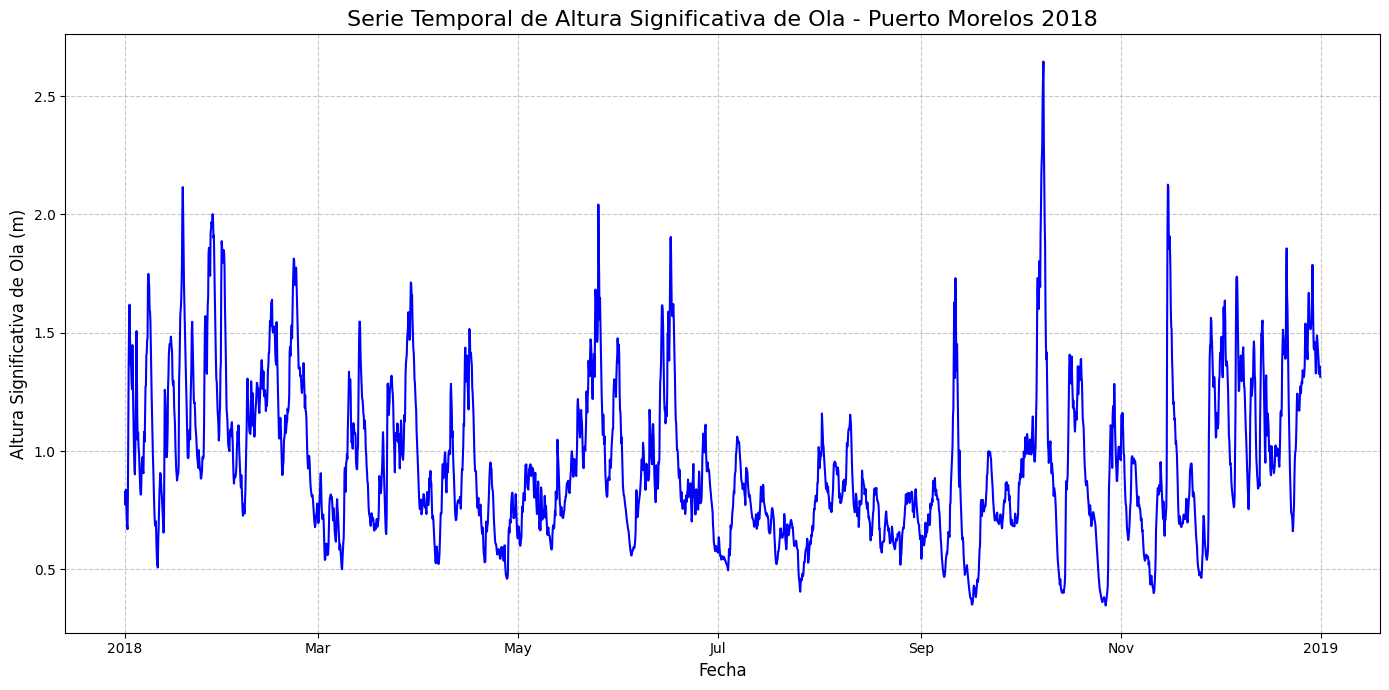

In [8]:
# Crear la figura y el eje
fig, ax = plt.subplots(figsize=(14, 7))

# Graficar la serie temporal
swh_serie.plot(ax=ax, color='blue', linewidth=1.5)

# Personalizar el gráfico
ax.set_title('Serie Temporal de Altura Significativa de Ola - Puerto Morelos 2018', fontsize=16)
ax.set_xlabel('Fecha', fontsize=12)
ax.set_ylabel(f'Altura Significativa de Ola ({swh.attrs.get("units", "m")})', fontsize=12)
ax.grid(True, linestyle='--', alpha=0.7)

# Mejorar la apariencia
plt.tight_layout()
plt.show()